<a href="https://colab.research.google.com/github/naufalfrdss/DeepLearning/blob/main/01.Week_2_SecondHand_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Install Pytorch dan Tensorflow**

In [174]:
# !pip install tensorflow
# !pip install torch torchvision

## **Import Library**

In [175]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from sklearn.impute import SimpleImputer
from tensorflow.keras.callbacks import EarlyStopping

## **DATA EXPLORING**

In [176]:
df = pd.read_csv('https://raw.githubusercontent.com/farrelrassya/teachingMLDL/refs/heads/main/02.%20Deep%20Learning/Dataset/secondhanddataset.csv')

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   v.id           1000 non-null   int64  
 1   on road old    1000 non-null   int64  
 2   on road now    1000 non-null   int64  
 3   years          1000 non-null   int64  
 4   km             1000 non-null   int64  
 5   rating         1000 non-null   int64  
 6   condition      1000 non-null   int64  
 7   economy        1000 non-null   int64  
 8   top speed      1000 non-null   int64  
 9   hp             1000 non-null   int64  
 10  torque         1000 non-null   int64  
 11  current price  1000 non-null   float64
dtypes: float64(1), int64(11)
memory usage: 93.9 KB


In [178]:
df.corr()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
v.id,1.000000,-0.029926,-0.030787,-0.034255,0.047400,-0.018263,-0.038548,0.047137,0.001613,-0.006997,-0.000632,-0.059460
on road old,-0.029926,1.000000,0.034113,0.007207,0.007488,-0.050717,-0.015682,-0.030097,-0.023816,-0.049266,0.008950,0.233035
on road now,-0.030787,0.034113,1.000000,0.004609,-0.053202,0.028280,-0.005043,-0.015880,0.012699,-0.012719,0.017955,0.282793
years,-0.034255,0.007207,0.004609,1.000000,-0.002089,0.027285,0.053579,0.050220,0.025148,-0.003272,0.028859,-0.011854
km,0.047400,0.007488,-0.053202,-0.002089,1.000000,-0.039930,-0.013640,0.032680,0.026450,-0.052918,0.013566,-0.935924
rating,-0.018263,-0.050717,0.028280,0.027285,-0.039930,1.000000,0.015943,-0.009757,-0.042222,-0.022623,0.004408,0.035038
condition,-0.038548,-0.015682,-0.005043,0.053579,-0.013640,0.015943,1.000000,0.058788,0.018472,-0.071552,0.047805,0.110108
economy,0.047137,-0.030097,-0.015880,0.050220,0.032680,-0.009757,0.058788,1.000000,-0.059402,-0.016782,0.041632,-0.034711
top speed,0.001613,-0.023816,0.012699,0.025148,0.026450,-0.042222,0.018472,-0.059402,1.000000,0.057827,-0.019697,-0.027993
hp,-0.006997,-0.049266,-0.012719,-0.003272,-0.052918,-0.022623,-0.071552,-0.016782,0.057827,1.000000,-0.013817,0.030238


In [179]:
df.duplicated().sum()

0

In [180]:
df.isna().sum()

,0
v.id,0
on road old,0
on road now,0
years,0
km,0
rating,0
condition,0
economy,0
top speed,0
hp,0


In [181]:
df.dropna(inplace=True)

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   v.id           1000 non-null   int64  
 1   on road old    1000 non-null   int64  
 2   on road now    1000 non-null   int64  
 3   years          1000 non-null   int64  
 4   km             1000 non-null   int64  
 5   rating         1000 non-null   int64  
 6   condition      1000 non-null   int64  
 7   economy        1000 non-null   int64  
 8   top speed      1000 non-null   int64  
 9   hp             1000 non-null   int64  
 10  torque         1000 non-null   int64  
 11  current price  1000 non-null   float64
dtypes: float64(1), int64(11)
memory usage: 93.9 KB


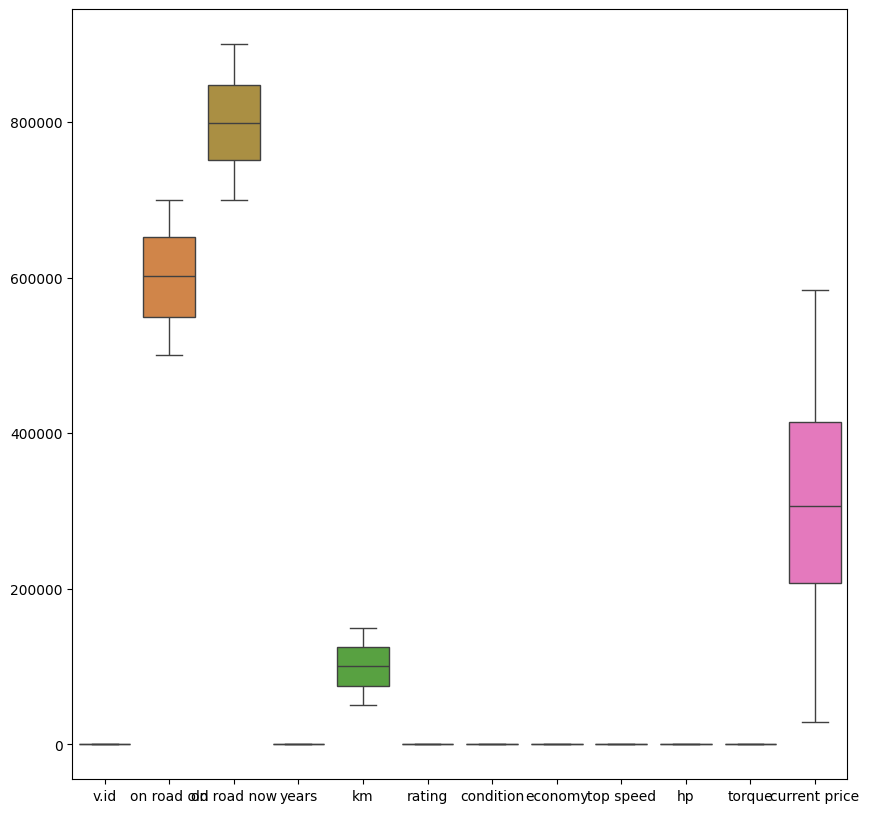

In [183]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=df)
plt.show()

## **Siapkan Data**

In [184]:
X = df.drop('current price', axis=1)
y = df['current price']

In [185]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [186]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [187]:
y_scaler = StandardScaler()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()
y_train = y_scaler.fit_transform(y_train.reshape(-1, 1)).ravel()
y_test = y_scaler.transform(y_test.reshape(-1, 1)).ravel()

In [188]:
X_train.shape

(800, 11)

In [189]:
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)

In [190]:
inputs = tf.keras.Input(shape=(X_train.shape[1],))
x = tf.keras.layers.Dense(32, activation='relu')(inputs)
x = tf.keras.layers.Dense(16, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='linear')(x)

## **Tensorflow Model**

In [191]:
model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [192]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model.compile(
    optimizer = 'adam',
    loss='mse'
)
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split= 0.15, callbacks=[early_stopping])

Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 1.2630 - val_loss: 1.1418
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.8352 - val_loss: 0.8589
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6756 - val_loss: 0.6259
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4448 - val_loss: 0.4222
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3007 - val_loss: 0.2667
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1751 - val_loss: 0.1760
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1313 - val_loss: 0.1316
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0978 - val_loss: 0.1098
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0766 - val_loss: 0.0924
Epoch 10/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0644 - val_loss: 0.0807
Epoch 11/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0524 - val_loss: 0.0698
Epoch 12/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.

In [193]:
y_test.min(), y_test.max()

(-1.993978528521615, 2.009277927849781)

In [194]:
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, model.predict(X_test))
mse = mean_squared_error(y_test, y_pred)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [195]:
print('============Hasil RMSE Tensorflow==========')
print(rmse)
print('============Hasil R2 Tensorflow============')
print(r2)
print('============Hasil MSE Tensorflow============')
print(mse)

============Hasil RMSE Tensorflow==========
0.09086685680457457
============Hasil R2 Tensorflow============
0.9923170293763008
============Hasil MSE Tensorflow============
0.00825678566554306


## **Pytorch Model**

In [196]:
X_train_torch = torch.tensor(X_train, dtype=torch.float32)
X_test_torch = torch.tensor(X_test, dtype=torch.float32)
y_train_torch = torch.tensor(y_train, dtype=torch.float32).view(-1,1)
y_test_torch = torch.tensor(y_test, dtype=torch.float32).view(-1,1)

In [197]:
class SimpleNN(nn.Module):
    def __init__(self,input):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input, 16)
        self.fc2 = nn.Linear(16, 8)
        self.fc3 = nn.Linear(8, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [198]:
model = SimpleNN(X_train.shape[1])
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0005)

In [199]:
# Early Stopping Parameters
best_val_loss = float("inf")
patience = 10
patience_counter = 0

# Training Loop dengan Early Stopping
for epoch in range(2000):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_torch)
    loss = criterion(outputs, y_train_torch)
    loss.backward()
    optimizer.step()

    # Validation
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_test_torch)
        val_loss = criterion(val_outputs, y_test_torch)

    # Early Stopping Logic
    if val_loss.item() < best_val_loss:
        best_val_loss = val_loss.item()
        patience_counter = 0
        best_model_state = model.state_dict()
    else:
        patience_counter += 1

    if patience_counter >= patience:
        print(f"Early stopping at epoch {epoch}")
        break

    # Print loss setiap 10 epoch
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Training Loss: {loss.item()}, Validation Loss: {val_loss.item()}")

# Load best model
model.load_state_dict(best_model_state)

print("PyTorch model training complete!")

# Evaluasi Model
model.eval()
with torch.no_grad():
    y_pred = model(X_test_torch).numpy()

Epoch 0, Training Loss: 1.044875144958496, Validation Loss: 1.144873023033142
Epoch 100, Training Loss: 0.7142022848129272, Validation Loss: 0.7921997308731079
Epoch 200, Training Loss: 0.2539254128932953, Validation Loss: 0.2935522496700287
Epoch 300, Training Loss: 0.04465922340750694, Validation Loss: 0.05883733928203583
Epoch 400, Training Loss: 0.01641199365258217, Validation Loss: 0.021937096491456032
Epoch 500, Training Loss: 0.010057514533400536, Validation Loss: 0.01425899937748909
Epoch 600, Training Loss: 0.007541520521044731, Validation Loss: 0.011541221290826797
Epoch 700, Training Loss: 0.005936484318226576, Validation Loss: 0.009880606085062027
Epoch 800, Training Loss: 0.0050303740426898, Validation Loss: 0.00856733601540327
Epoch 900, Training Loss: 0.0044424873776733875, Validation Loss: 0.007794658653438091
Epoch 1000, Training Loss: 0.0040420168079435825, Validation Loss: 0.007270236033946276
Epoch 1100, Training Loss: 0.0037140033673495054, Validation Loss: 0.00681

In [200]:
y_test_torch.min(), y_test_torch.max()

(tensor(-1.9940), tensor(2.0093))

In [201]:
y_pred = model(X_test_torch).detach().numpy()

rmse = np.sqrt(mean_squared_error(y_test_torch, model(X_test_torch).detach().numpy()))
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test_torch, model(X_test_torch).detach().numpy())

In [202]:
print('============Hasil RMSE Pytorch==========')
print(rmse)
print('============Hasil R2 Pytorch==========')
print(r2)
print('============Hasil MSE Pytorch==========')
print(mse)

============Hasil RMSE Pytorch==========
0.06553327132815441
============Hasil R2 Pytorch==========
0.9960038490813596
============Hasil MSE Pytorch==========
0.004294609650969505


## **Persamaan Matematika Digunakan**

### **1. MSE**

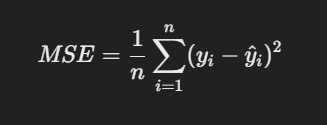

MSE digunakan untuk mengukur rata-rata kesalahan kuadrat antara nilai aktual (
𝑦
𝑖
 ) dan nilai prediksi (
𝑦
^
𝑖
 )


yi = nilai aktual

𝑦
^
i
​
  = nilai prediksi

𝑛
= jumlah sampel

MSE menghitung rata-rata dari selisih antara nilai aktual dan prediksi yang dikuadratkan.
Semakin kecil MSE, semakin baik model dalam memprediksi data.


### **2. RMSE**

RMSE adalah akar kuadrat dari MSE, yang mengubah skala kesalahan kembali ke satuan aslinya.

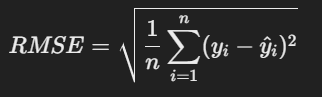

**n** adalah jumlah sampel dalam data

**y_i** adalah nilai aktual

**ŷ_i** adalah nilai prediksi

*   RMSE menghitung rata-rata dari selisih kuadrat antara nilai prediksi dan nilai aktual kemudian diambil akar kuadratnya
*   Semakin kecil nilai RMSE, semakin baik kualitas model tersebut.

### **3. R^2 (R-Squared)**

R ^2 mengukur seberapa baik model menjelaskan variasi dalam data.

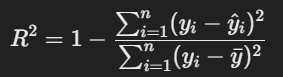

*   y
ˉ
​
  adalah rata-rata dari nilai aktual.
* Penyebut menunjukkan total variasi dalam data.
*   Pembilang menunjukkan kesalahan prediksi.
*  Jika
𝑅
2
=
1
, model sempurna. Jika mendekati 0 atau negatif, model buruk.